In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ibu = pd.read_csv("Documents/Aretha/Semester3/AOL_AI/Maternal Health Risk Data Set.csv")

print("Dataset Ibu berhasil dibaca!")
print("Jumlah data:", ibu.shape)
ibu.head()

Dataset Ibu berhasil dibaca!
Jumlah data: (1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
ibu['RiskLevel'] = ibu['RiskLevel'].replace({
    'low risk': 0,
    'mid risk': 1,
    'high risk': 2
})

print("Label RiskLevel selesai diperbaiki!")
ibu['RiskLevel'].value_counts()

# Fitur berdasarkan dataset maternal health
X = ibu[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = ibu['RiskLevel']

print("\nFitur dan label siap digunakan!")
print("Fitur:", list(X.columns))

Label RiskLevel selesai diperbaiki!

Fitur dan label siap digunakan!
Fitur: ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


/var/folders/v3/nyw6ps3j0yvg52l6fpz2_qnm0000gn/T/ipykernel_6824/3031498494.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ibu['RiskLevel'] = ibu['RiskLevel'].replace({


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data berhasil dibagi!")
print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Data berhasil dibagi!
Train size: (811, 6)
Test size : (203, 6)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Buat model Decision Tree
dt_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)

# Train model
dt_model.fit(X_train_scaled, y_train)

# Prediksi
dt_pred = dt_model.predict(X_test_scaled)

In [7]:
print("\nHASIL DECISION TREE")
print("Accuracy:", round(accuracy_score(y_test, dt_pred), 4))

print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_pred))


HASIL DECISION TREE
Accuracy: 0.8374

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        81
           1       0.77      0.79      0.78        67
           2       0.90      0.96      0.93        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203


Confusion Matrix:
[[64 16  1]
 [ 9 53  5]
 [ 2  0 53]]


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Buat model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

# Train model
rf_model.fit(X_train_scaled, y_train)

# Prediksi
rf_pred = rf_model.predict(X_test_scaled)

In [9]:
print("\nHASIL RANDOM FOREST")
print("Accuracy:", round(accuracy_score(y_test, rf_pred), 4))

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


HASIL RANDOM FOREST
Accuracy: 0.8473

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        81
           1       0.79      0.81      0.80        67
           2       0.88      0.96      0.92        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.85       203
weighted avg       0.85      0.85      0.85       203


Confusion Matrix:
[[65 14  2]
 [ 8 54  5]
 [ 2  0 53]]


In [10]:
print("\n=============================================")
print("PERBANDINGAN AKURASI MODEL (IBU)")
print("=============================================")

acc_dt = accuracy_score(y_test, dt_pred)
acc_rf = accuracy_score(y_test, rf_pred)

print("Decision Tree Accuracy :", round(acc_dt, 4))
print("Random Forest Accuracy :", round(acc_rf, 4))

if acc_rf > acc_dt:
    print("\nRandom Forest lebih akurat!")
else:
    print("\nDecision Tree lebih akurat!")


PERBANDINGAN AKURASI MODEL (IBU)
Decision Tree Accuracy : 0.8374
Random Forest Accuracy : 0.8473

Random Forest lebih akurat!


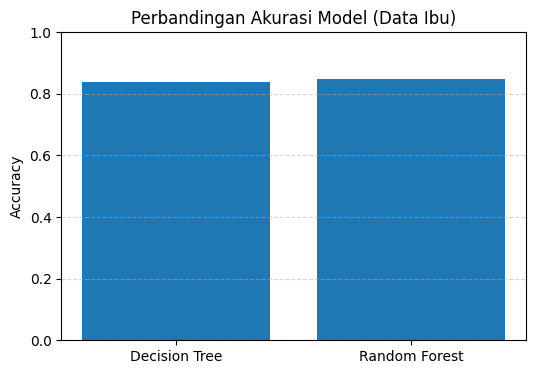

In [11]:
import matplotlib.pyplot as plt

ak_dt = accuracy_score(y_test, dt_pred)
ak_rf = accuracy_score(y_test, rf_pred)

plt.figure(figsize=(6,4))
plt.bar(['Decision Tree', 'Random Forest'], [ak_dt, ak_rf])
plt.title("Perbandingan Akurasi Model (Data Ibu)")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

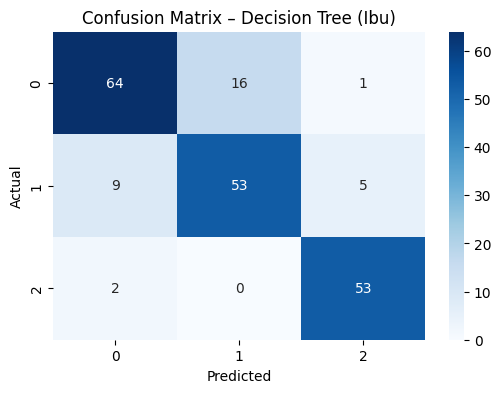

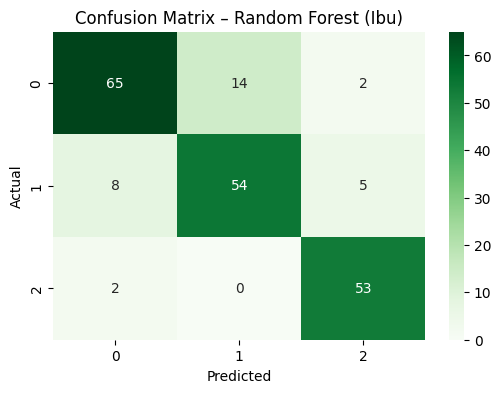

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Decision Tree
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Decision Tree (Ibu)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Random Forest (Ibu)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

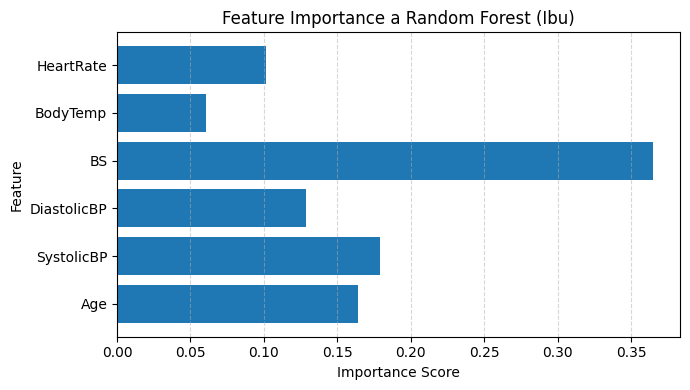

In [13]:
import numpy as np
import matplotlib.pyplot as plt

fi = rf_model.feature_importances_

plt.figure(figsize=(7,4))
plt.barh(X.columns, fi)
plt.title("Feature Importance a Random Forest (Ibu)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

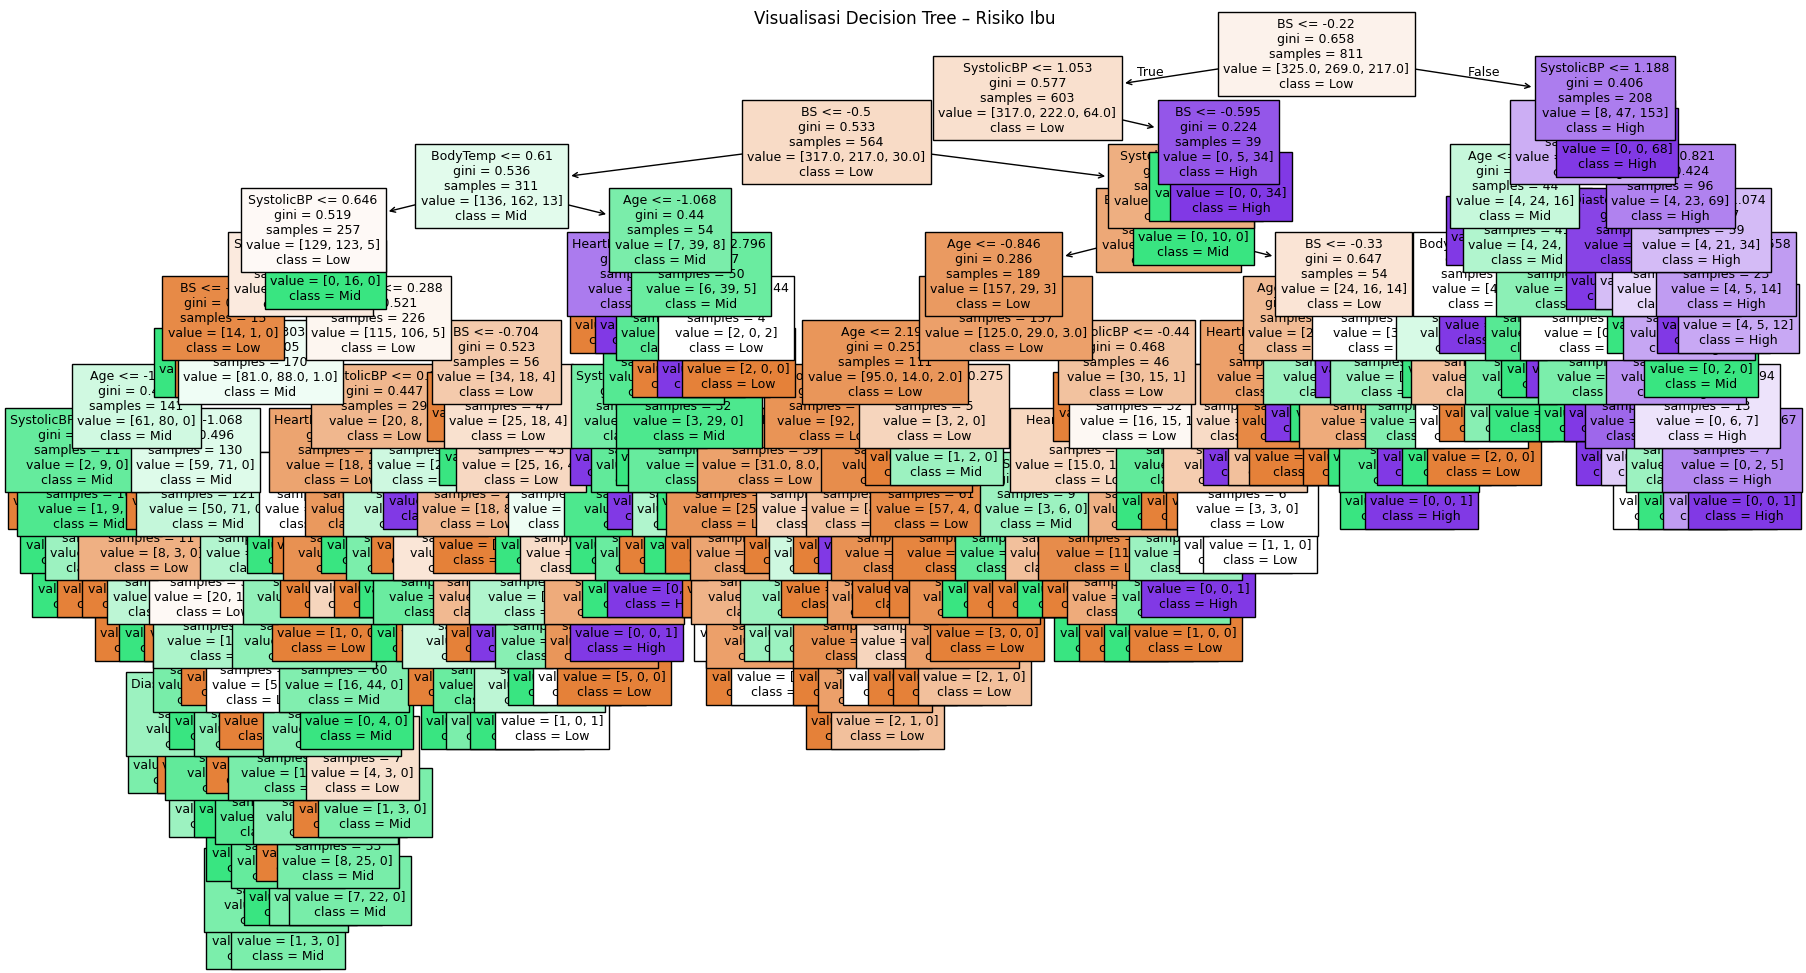

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Low", "Mid", "High"],
    filled=True,
    fontsize=9
)
plt.title("Visualisasi Decision Tree – Risiko Ibu")
plt.show()

In [15]:
# Contoh data ibu (ubah sesuai kebutuhan)
contoh = np.array([[28, 130, 85, 7.2, 98.5, 90]])

# Scaling
contoh_scaled = scaler.transform(contoh)

# Prediksi (hasil dalam angka: 0, 1, 2)
dt_result = dt_model.predict(contoh_scaled)[0]
rf_result = rf_model.predict(contoh_scaled)[0]

# Mapping angka → label teks
label_map = {
    0: "low risk",
    1: "mid risk",
    2: "high risk"
}

print("Decision Tree:", label_map[dt_result])
print("Random Forest:", label_map[rf_result])

Decision Tree: mid risk
Random Forest: mid risk


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# Ambil 10 data pertama dari X_test
sample_data = X_test.iloc[:10]

# Scaling data sample
sample_scaled = scaler.transform(sample_data)

# Prediksi dengan kedua model
dt_batch = dt_model.predict(sample_scaled)
rf_batch = rf_model.predict(sample_scaled)

# Mapping label angka → teks
label_map = {
    0: "low risk",
    1: "mid risk",
    2: "high risk"
}

dt_labels = [label_map[i] for i in dt_batch]
rf_labels = [label_map[i] for i in rf_batch]

print("Prediksi Batch Decision Tree:")
print(dt_labels)

print("\nPrediksi Batch Random Forest:")
print(rf_labels)

Prediksi Batch Decision Tree:
['mid risk', 'mid risk', 'low risk', 'mid risk', 'low risk', 'low risk', 'high risk', 'low risk', 'mid risk', 'mid risk']

Prediksi Batch Random Forest:
['mid risk', 'mid risk', 'low risk', 'mid risk', 'low risk', 'low risk', 'high risk', 'low risk', 'mid risk', 'mid risk']


In [17]:
from sklearn.model_selection import cross_val_score

cv_dt = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross Validation Decision Tree:", cv_dt)
print("Rata-rata:", cv_dt.mean())

print("\nCross Validation Random Forest:", cv_rf)
print("Rata-rata:", cv_rf.mean())

Cross Validation Decision Tree: [0.80368098 0.7654321  0.75925926 0.84567901 0.83950617]
Rata-rata: 0.8027115049609937

Cross Validation Random Forest: [0.80368098 0.7962963  0.7962963  0.85185185 0.85802469]
Rata-rata: 0.8212300234795122


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Grid parameter yang diuji
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train GridSearch
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy :", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy : 0.8027115049609937


In [19]:
best_dt = DecisionTreeClassifier(
    max_depth=grid.best_params_['max_depth'],
    min_samples_split=grid.best_params_['min_samples_split'],
    min_samples_leaf=grid.best_params_['min_samples_leaf'],
    random_state=42
)

# Train model baru
best_dt.fit(X_train_scaled, y_train)

# Prediksi
best_dt_pred = best_dt.predict(X_test_scaled)

# Evaluasi
print("HASIL DECISION TREE TER-TUNING (BEST MODEL)")
print("Accuracy:", round(accuracy_score(y_test, best_dt_pred), 4))

print("\nClassification Report:")
print(classification_report(y_test, best_dt_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_dt_pred))

HASIL DECISION TREE TER-TUNING (BEST MODEL)
Accuracy: 0.8374

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        81
           1       0.77      0.79      0.78        67
           2       0.90      0.96      0.93        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203


Confusion Matrix:
[[64 16  1]
 [ 9 53  5]
 [ 2  0 53]]


In [21]:
acc_dt_default = accuracy_score(y_test, dt_pred)
acc_dt_tuned = accuracy_score(y_test, best_dt_pred)
acc_rf = accuracy_score(y_test, rf_pred)

print("PERBANDINGAN AKURASI MODEL")
print("---------------------------------------")
print("Decision Tree (Default) :", round(acc_dt_default, 4))
print("Decision Tree (Tuned)   :", round(acc_dt_tuned, 4))
print("Random Forest           :", round(acc_rf, 4))

# Analisis otomatis
if acc_dt_tuned > acc_dt_default:
    print("\nHyperparameter tuning berhasil meningkatkan akurasi Decision Tree!")
else:
    print("\nTuning tidak meningkatkan akurasi, mungkin dataset perlu fitur tambahan.")

PERBANDINGAN AKURASI MODEL
---------------------------------------
Decision Tree (Default) : 0.8374
Decision Tree (Tuned)   : 0.8374
Random Forest           : 0.8473

Tuning tidak meningkatkan akurasi, mungkin dataset perlu fitur tambahan.


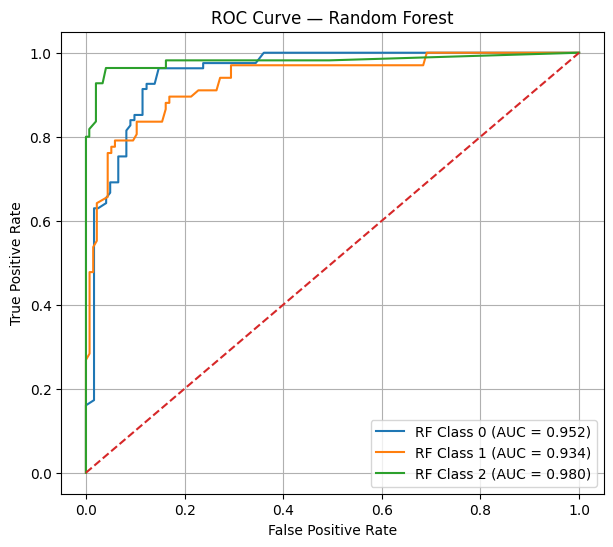

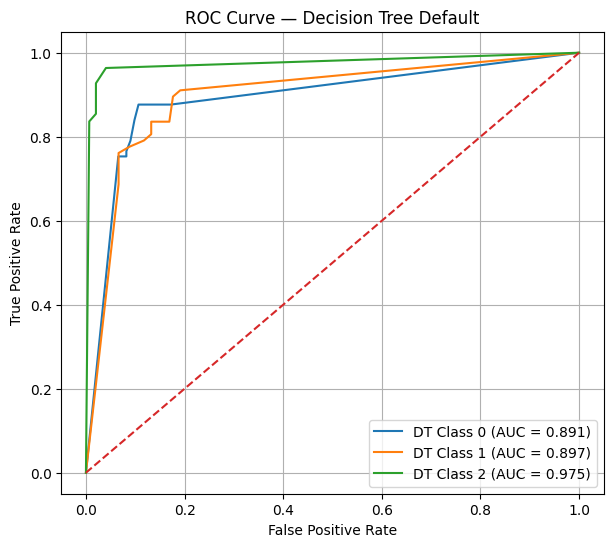

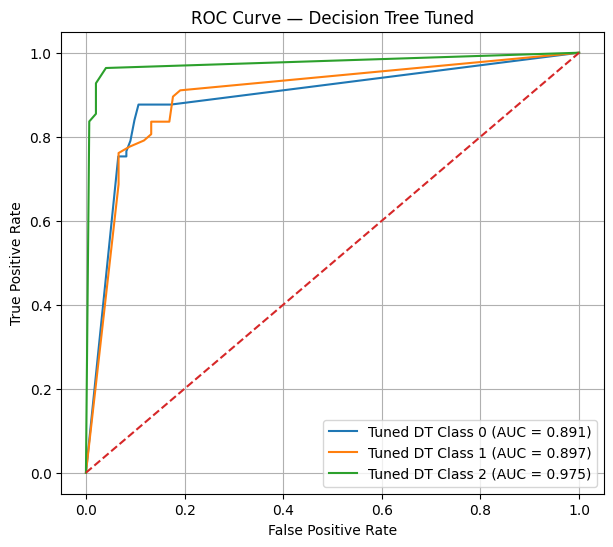

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize target label menjadi 3 kolom (0,1,2)
y_test_bin = label_binarize(y_test, classes=[0,1,2])

# Probabilitas prediksi
dt_prob = dt_model.predict_proba(X_test_scaled)
dt_tuned_prob = best_dt.predict_proba(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)

# ROC tiap kelas untuk Random Forest
fpr_rf = {}
tpr_rf = {}
roc_auc_rf = {}

fpr_dt = {}
tpr_dt = {}
roc_auc_dt = {}

fpr_dt_tuned = {}
tpr_dt_tuned = {}
roc_auc_dt_tuned = {}

for i in range(3):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], rf_prob[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], dt_prob[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

    fpr_dt_tuned[i], tpr_dt_tuned[i], _ = roc_curve(y_test_bin[:, i], dt_tuned_prob[:, i])
    roc_auc_dt_tuned[i] = auc(fpr_dt_tuned[i], tpr_dt_tuned[i])

# Plot ROC untuk Random Forest
plt.figure(figsize=(7,6))
for i in range(3):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f"RF Class {i} (AUC = {roc_auc_rf[i]:.3f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve — Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Plot ROC untuk Decision Tree Default
plt.figure(figsize=(7,6))
for i in range(3):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f"DT Class {i} (AUC = {roc_auc_dt[i]:.3f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve — Decision Tree Default")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Plot ROC untuk Decision Tree Tuned
plt.figure(figsize=(7,6))
for i in range(3):
    plt.plot(fpr_dt_tuned[i], tpr_dt_tuned[i], label=f"Tuned DT Class {i} (AUC = {roc_auc_dt_tuned[i]:.3f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve — Decision Tree Tuned")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [24]:
# Decision Tree Accuracy
dt_train_pred = dt_model.predict(X_train_scaled)
dt_train_acc  = accuracy_score(y_train, dt_train_pred)
dt_val_acc    = accuracy_score(y_test, dt_pred)

# Random Forest Accuracy
rf_train_pred = rf_model.predict(X_train_scaled)
rf_train_acc  = accuracy_score(y_train, rf_train_pred)
rf_val_acc    = accuracy_score(y_test, rf_pred)

print("\n================ TRAINING & VALIDATION ACCURACY ================")
print(f"Decision Tree  → Train: {dt_train_acc:.4f} | Validation: {dt_val_acc:.4f}")
print(f"Random Forest  → Train: {rf_train_acc:.4f} | Validation: {rf_val_acc:.4f}")


================ TRAINING & VALIDATION ACCURACY ================
Decision Tree  → Train: 0.9309 | Validation: 0.8374
Random Forest  → Train: 0.9309 | Validation: 0.8473


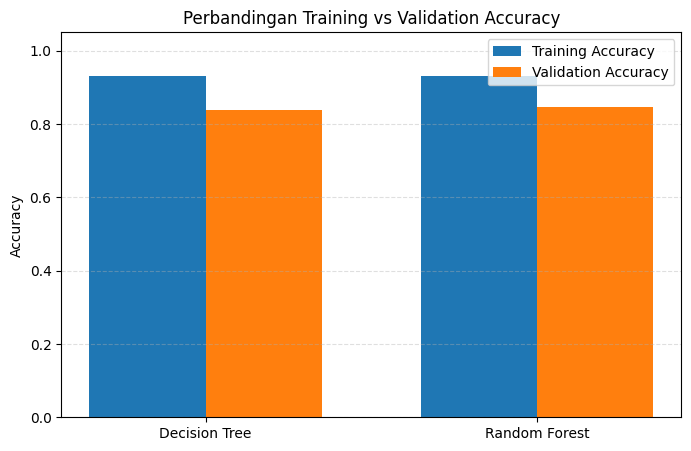

In [25]:
models = ["Decision Tree", "Random Forest"]
train_acc = [dt_train_acc, rf_train_acc]
val_acc   = [dt_val_acc, rf_val_acc]

x = np.arange(len(models))
w = 0.35  # width bar

plt.figure(figsize=(8,5))
plt.bar(x - w/2, train_acc, width=w, label="Training Accuracy")
plt.bar(x + w/2, val_acc,   width=w, label="Validation Accuracy")

plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Perbandingan Training vs Validation Accuracy")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [29]:
import joblib

joblib.dump(dt_model, "ibu_decision_tree.pkl")
joblib.dump(rf_model, "ibu_random_forest.pkl")
joblib.dump(scaler, "ibu_scaler.pkl")

print("Model Ibu berhasil disimpan!")

Model Ibu berhasil disimpan!
